In [2]:
import os
path = "D:/aaaaaaaaaaaaaaaaa/nus/fyp/Q2A-master/Q2A-master/encoder/configs/data/assistq/train"
datanames = os.listdir(path)
for i in datanames:
    print("'"+i+"',",end='')

'aircon_utr3b','airfryer_gye82','airfryer_pe2j7','airfryer_w9rzm','bicycle_g8h94','blender_d4og8','blender_tg2xq','blender_zuw28','camera_4paj0','camera_9awdp','camera_a409h','coffeemachine_d2stw','dehydrator_jvzgp','diffuser_lxcd4','dryer_am5jp','dryer_d4uqs','dryer_vc1kl','inductioncooker_bjye3','inductioncooker_v0jzx','inductioncooker_veifx','kiettle_rc3pf','kitchenscale_025qs','kitchenscale_7shbw','kitchenscale_jsgih','kitchenscale_pqejy','kitchenscale_wk150','kitchentimer_fr3ld','kitchentimer_nr0vk','lightstand_ro8fj','microwave_clhpa','microwave_etrc9','microwave_gz61t','microwave_h43qm','microwave_kflra','microwave_ljbak','microwave_m0fgh','microwave_m5vq3','microwave_r5h7q','microwave_y3fpx','microwave_y693a','microwave_yw0gr','microwave_znl6u','mixer_muhce','oven_968hd','oven_e7fsy','oven_g6xvo','oven_lhap5','oven_un32d','oven_wa67l','oven_wn85g','printer_5jpry','printer_bf69n','rangehood_2pk8j','ricecooker_26ax0','ricecooker_5apek','ricecooker_af46c','ricecooker_tlvys','ricec

In [40]:
import os
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import random


num_classes = 80  # 分类数量
batch_size = 2
num_epochs = 10  # 训练轮次
lr = 0.02
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 读取并展示图片

file_root = "D:/aaaaaaaaaaaaaaaaa/nus/fyp/Q2A-master/Q2A-master/encoder/configs/train"
classes = ['aircon_utr3b','airfryer_gye82','airfryer_pe2j7','airfryer_w9rzm','bicycle_g8h94','blender_d4og8','blender_tg2xq','blender_zuw28','camera_4paj0','camera_9awdp','camera_a409h','coffeemachine_d2stw','dehydrator_jvzgp','diffuser_lxcd4','dryer_am5jp','dryer_d4uqs','dryer_vc1kl','inductioncooker_bjye3','inductioncooker_v0jzx','inductioncooker_veifx','kiettle_rc3pf','kitchenscale_025qs','kitchenscale_7shbw','kitchenscale_jsgih','kitchenscale_pqejy','kitchenscale_wk150','kitchentimer_fr3ld','kitchentimer_nr0vk','lightstand_ro8fj','microwave_clhpa','microwave_etrc9','microwave_gz61t','microwave_h43qm','microwave_kflra','microwave_ljbak','microwave_m0fgh','microwave_m5vq3','microwave_r5h7q','microwave_y3fpx','microwave_y693a','microwave_yw0gr','microwave_znl6u','mixer_muhce','oven_968hd','oven_e7fsy','oven_g6xvo','oven_lhap5','oven_un32d','oven_wa67l','oven_wn85g','printer_5jpry','printer_bf69n','rangehood_2pk8j','ricecooker_26ax0','ricecooker_5apek','ricecooker_af46c','ricecooker_tlvys','ricecooker_tomn0','ricecooker_zxuqy','toaster_ja9zg','toaster_xwc03','treadmill_npdev','treadmill_nu3ob','vacuum_1csuz','washingmachine_735oe','washingmachine_8fzkt','washingmachine_dz980','washingmachine_gxblk','washingmachine_h4n8j','washingmachine_kc4eb','washingmachine_kstcf','washingmachine_m79j0','washingmachine_tyap1','washingmachine_ujs4r','washingmachine_uomyf','washingmachine_wtbih','watch_0ku25','watch_c8zhg','watch_yw2mz','waterpurifier_b2j3o']
nums = [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]  # 每种类别的个数

def read_data(path):
    file_name = os.listdir(path)  # 获取所有文件的文件名称
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []
    # 每个类别随机抽取20%作为测试集
    train_num = [int(num * 1 / 2) for num in nums]
    test_num = [nums[i] - train_num[i] for i in range(len(nums))]

    for idx, f_name in enumerate(file_name):  # 每个类别一个idx，即以idx作为标签
        im_dirs = path + '/' + f_name+'/images'
        im_path = os.listdir(im_dirs)  # 每个不同类别图像文件夹下所有图像的名称

        index = list(range(len(im_path)))
        random.shuffle(index)  # 打乱顺序
        im_path_ = list(np.array(im_path)[index])
        test_path = im_path_[:test_num[idx]]  # 测试数据的路径
        train_path = im_path_[test_num[idx]:]  # 训练数据的路径

        for img_name in train_path:
            # 会读到desktop.ini,要去掉
            if img_name == 'desktop.ini':
                continue
            img = Image.open(im_dirs + '/' + img_name).convert("RGB")  # img shape: (120, 85, 3) 高、宽、通道
            # 对图片进行变形
            img = img.resize((32, 32), Image.ANTIALIAS)  # 宽、高
            train_data.append(img)
            train_labels.append(idx)

        for img_name in test_path:
            # 会读到desktop.ini,要去掉
            if img_name == 'desktop.ini':
                continue
            img = Image.open(im_dirs + '/' + img_name).convert("RGB")  # img shape: (120, 85, 3) 高、宽、通道
            # 对图片进行变形
            img = img.resize((32, 32), Image.ANTIALIAS)  # 宽、高
            test_data.append(img)
            test_labels.append(idx)

    print('训练集大小：', len(train_data), ' 测试集大小：', len(test_data))

    return train_data, train_labels, test_data, test_labels

# 一次性读取全部的数据
train_data, train_labels, test_data, test_labels = read_data(file_root)

E:\anaconda\envs\dl\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
E:\anaconda\envs\dl\lib\site-packages\ipykernel_launcher.py:60: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.


训练集大小： 86  测试集大小： 80


In [41]:
# 定义一个Transform操作
transform = transforms.Compose(
    [transforms.ToTensor(),  # 变为tensor
     # 对数据按通道进行标准化，即减去均值，再除以方差, [0-1]->[-1,1]
     transforms.Normalize(mean=[0.4686, 0.4853, 0.5193], std=[0.1720, 0.1863, 0.2175])
     ]
)

In [42]:

# 自定义Dataset类实现每次取出图片，将PIL转换为Tensor
class MyDataset(Dataset):
    def __init__(self, data, label, trans):
        self.len = len(data)
        self.data = data
        self.label = label
        self.trans = trans

    def __getitem__(self, index):  # 根据索引返回数据和对应的标签
        return self.trans(self.data[index]), self.label[index]

    def __len__(self):
        return self.len


# 调用自己创建的Dataset
train_dataset = MyDataset(train_data, train_labels, transform)
test_dataset = MyDataset(test_data, test_labels, transform)


In [43]:
# 生成data loader
train_iter = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0
)
test_iter = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=0
)

In [44]:
def conv2d(X, K):
    '''
    :param X: 样本输入，shape(batch_size,H,W)
    :param K: 卷积核，shape(k_h,k_w)
    :return: Y 卷积结果，shape(batch_size, H-k_h+1, W-k_w+1)
    '''
    batch_size, H, W = X.shape
    k_h, k_w = K.shape
    # 初始化 Y
    Y = torch.zeros((batch_size, H - k_h + 1, W - k_w + 1)).to(device)
    for i in range(Y.shape[1]):
        for j in range(Y.shape[2]):
            Y[:, i, j] = (X[:, i: i + k_h, j:j + k_w] * K).sum(dim=2).sum(dim=1)
    return Y

In [45]:
def conv2d_multi_in(X, K):
    '''
    :param X: (batch_size, C_in，H，W)代表有C个输入通道
    :param K: (C_in, k_h, k_w)
    :return: (batch_size, H_out, W_out)
    '''
    res = conv2d(X[:, 0, :, :], K[0, :, :])
    for i in range(1, X.shape[1]):  # 多个通道的结果相加
        res += conv2d(X[:, i, :, :], K[i, :, :])
    return res

In [46]:
# 实现多输出通道
# 输出通道数 = 卷积核个数
def conv2d_multi_in_out(X, K):
    '''
    :param X: (batch_size, C_in，H，W)代表有C个输入通道
    :param K: (K_num, C_in, k_h, k_w) k_num表示卷积核的个数
    :return: (batch_size, K_num, H_out, W_out)
    '''
    return torch.stack([conv2d_multi_in(X, k) for k in K], dim=1)

In [47]:
class MyConv2D(torch.nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size):
        super(MyConv2D, self).__init__()
        # 初始化卷积层2个参数：卷积核、偏差
        if isinstance(kernel_size, int):  # 如果kernel size是一个数
            kernel_size = (kernel_size, kernel_size)
        # weight的shape:(卷积核个数/输出通道数，输入通道数，卷积核高，卷积核宽)
        # torch.randn:返回一个符合均值为0，方差为1的正态分布（标准正态分布）中填充随机数的张量
        self.weight = torch.nn.Parameter(torch.randn((out_channels, in_channels) + kernel_size))
        self.bias = torch.nn.Parameter(torch.randn(out_channels, 1, 1))

    def forward(self, x):
        '''
        :param x:
        :return:
        '''
        return conv2d_multi_in_out(x, self.weight) + self.bias

In [48]:
class MyConvModule(torch.nn.Module):
    def __init__(self):
        super(MyConvModule, self).__init__()
        # 定义一层卷积
        self.conv = torch.nn.Sequential(
            MyConv2D(in_channels=3, out_channels=32, kernel_size=3),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(inplace=True)  # inplace=True表示计算出来的结果会替换掉原来的Tensor
        )
        # 输出层，将输出通道数变为分类数量
        self.fc = torch.nn.Linear(32, num_classes)

    def forward(self, X):
        # 图片经过一层卷积，输出（batch_size，C_out, H, W)
        out = self.conv(X)
        # 使用平均池化层将图片大小变为1*1(图片原大小32*32,卷积后为30*30
        out = F.avg_pool2d(out, 30)
        # 将out从shape batch_size*32*1*1变为batch_size*32
        out = out.squeeze()  # squeeze的用法：
        # 输入到全连接层
        out = self.fc(out)
        return out


net = MyConvModule()
net.to(device)
# 损失函数和优化器
loss = torch.nn.CrossEntropyLoss()  # 交叉熵损失函数
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [49]:
def train(net, data_loader, device):
    net.train()  # 指定为训练模式
    train_batch_num = len(data_loader)
    total_loss = 0.0
    correct = 0  # 记录共有多少个样本被正确分类
    sample_num = 0

    # 遍历每个batch进行训练
    for data, target in data_loader:
        # 将图片和标签放入指定的device中
        data = data.to(device)
        target = target.to(device)
        # 将当前梯度清零
        optimizer.zero_grad()
        # 使用模型计算出结果
        y_hat = net(data)
        # 计算损失
        loss_ = loss(y_hat, target)
        # 进行反向传播
        loss_.backward()
        optimizer.step()
        total_loss += loss_.item()
        cor = (torch.argmax(y_hat, 1) == target).sum().item()
        correct += cor
        # 累加当前的样本总数
        sample_num += target.shape[0]
        print('loss: %.4f  acc: %.4f' % (loss_.item(), cor/target.shape[0]))
    # 平均loss和准确率
    loss_ = total_loss / train_batch_num
    acc = correct / sample_num
    return loss_, acc

In [50]:
# 测试
def test(net, data_loader, device):
    net.eval()  # 指定当前模式为测试模式（针对BN层和dropout层）
    test_batch_num = len(data_loader)
    total_loss = 0
    correct = 0
    sample_num = 0
    # 指定不进行梯度计算（没有反向传播也会计算梯度，增大GPU开销
    with torch.no_grad():
        for data, target in data_loader:
            data = data.to(device)
            target = target.to(device)
            output = net(data)
            loss_ = loss(output, target)
            total_loss += loss_.item()
            correct += (torch.argmax(output, 1) == target).sum().item()
            sample_num += target.shape[0]
    loss_ = total_loss / test_batch_num
    acc = correct / sample_num
    return loss_, acc

In [ ]:
# 模型训练与测试
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '0' #

train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
num_epochs=10

for epoch in range(num_epochs):
    # 在训练集上训练
    train_loss, train_acc = train(net, data_loader=train_iter, device=device)
    # 测试集上验证
    test_loss, test_acc = test(net, data_loader=test_iter, device=device)

    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    print('epoch %d, train loss: %.4f, train acc: %.3f' % (epoch+1, train_loss, train_acc))
    print('test loss: %.4f, test acc: %.3f' % (test_loss, test_acc))

loss: 4.4664  acc: 0.0000
loss: 4.1917  acc: 0.0000
loss: 4.2522  acc: 0.0000
loss: 4.4567  acc: 0.0000
loss: 4.4760  acc: 0.0000
loss: 4.4624  acc: 0.0000
loss: 4.1259  acc: 0.0000
loss: 4.3754  acc: 0.0000
loss: 4.5417  acc: 0.0000
loss: 4.6148  acc: 0.0000
loss: 4.3303  acc: 0.0000
loss: 4.1772  acc: 0.5000
loss: 4.5813  acc: 0.0000
loss: 4.4137  acc: 0.0000
loss: 4.5744  acc: 0.0000
loss: 4.3653  acc: 0.0000
loss: 4.4777  acc: 0.0000
loss: 4.3474  acc: 0.0000
loss: 4.2789  acc: 0.0000
loss: 4.3985  acc: 0.0000
loss: 4.3251  acc: 0.0000
loss: 4.1628  acc: 0.0000
loss: 4.4733  acc: 0.0000
loss: 4.5239  acc: 0.0000
loss: 4.5441  acc: 0.0000
loss: 4.2162  acc: 0.0000
loss: 4.5064  acc: 0.0000
loss: 4.1915  acc: 0.0000
loss: 4.4316  acc: 0.0000
loss: 4.2676  acc: 0.0000
loss: 4.5745  acc: 0.0000
loss: 4.4608  acc: 0.0000
loss: 4.2853  acc: 0.0000
loss: 4.3326  acc: 0.0000
loss: 4.3891  acc: 0.0000
loss: 4.4564  acc: 0.0000
loss: 4.6117  acc: 0.0000
loss: 4.6019  acc: 0.0000
loss: 4.7371

In [ ]:
# 绘制函数
def draw_(x, train_Y, test_Y, ylabel):
    plt.plot(x, train_Y, label='train_' + ylabel, linewidth=1.5)
    plt.plot(x, test_Y, label='test_' + ylabel, linewidth=1.5)
    plt.xlabel('epoch')
    plt.ylabel(ylabel)
    plt.legend()  # 加上图例
    plt.show()


# 绘制loss曲线
x = np.linspace(0, len(train_loss_list), len(train_loss_list))
draw_(x, train_loss_list, test_loss_list, 'loss')
draw_(x, train_acc_list, test_acc_list, 'accuracy')


In [ ]:
# 使用torch.nn实现二维卷积
class ConvModule(torch.nn.Module):
    def __init__(self):
        super(ConvModule, self).__init__()
        # 定义一个三层卷积（卷积层越少曲线越平滑，卷积层越多acc越高）
        self.conv = torch.nn.Sequential(
            # 第一层卷积
            # stride步长,padding填充
            torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=0),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(inplace=True),
            # 第二层卷积
            torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(inplace=True),
            # 第三层卷积
            torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(inplace=True)
        )
        # 输出层，将输出通道数变为分类数
        self.fc = torch.nn.Linear(128, num_classes)

    def forward(self, X):
        out = self.conv(X)  # 输出维度(batch_size, C_out, H, W)
        # 平均池化
        out = F.avg_pool2d(out, 26)  # 32-2-2-2=26 池化后图片大小1*1
        # 将out从batch size*128*1*1变为batch size*128
        out = out.squeeze()
        out = self.fc(out)
        return out


net = ConvModule()
net.to(device)
# 损失函数和优化器
loss = torch.nn.CrossEntropyLoss()  # 交叉熵损失函数
optimizer = torch.optim.SGD(net.parameters(), lr=lr)


In [15]:
# 模型训练与测试
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '0' # 下面老是报错 shape 不一致

train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
num_epochs=100

for epoch in range(num_epochs):
    # 在训练集上训练
    train_loss, train_acc = train(net, data_loader=train_iter, device=device)
    # 测试集上验证
    test_loss, test_acc = test(net, data_loader=test_iter, device=device)

    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    print('epoch %d, train loss: %.4f, train acc: %.3f' % (epoch+1, train_loss, train_acc))
    print('test loss: %.4f, test acc: %.3f' % (test_loss, test_acc))

loss: 1.8492  acc: 0.1016
loss: 1.8471  acc: 0.1133
loss: 1.7927  acc: 0.1562
loss: 1.7486  acc: 0.2031
loss: 1.7334  acc: 0.2227
loss: 1.6761  acc: 0.3047
loss: 1.6972  acc: 0.2773
loss: 1.6462  acc: 0.3750
loss: 1.6372  acc: 0.3125
loss: 1.5963  acc: 0.3438
loss: 1.6365  acc: 0.3672
loss: 1.5355  acc: 0.4062
loss: 1.5658  acc: 0.4023
loss: 1.5868  acc: 0.3672
loss: 1.5691  acc: 0.3633
loss: 1.5343  acc: 0.4219
loss: 1.5126  acc: 0.4648
loss: 1.5221  acc: 0.4297
loss: 1.5001  acc: 0.4805
loss: 1.4972  acc: 0.4102
loss: 1.5041  acc: 0.4453
loss: 1.4585  acc: 0.4688
loss: 1.4872  acc: 0.4805
loss: 1.4441  acc: 0.4844
loss: 1.4763  acc: 0.4414
loss: 1.4517  acc: 0.4453
loss: 1.4759  acc: 0.4531
loss: 1.4514  acc: 0.4570
loss: 1.4540  acc: 0.4414
loss: 1.4293  acc: 0.4766
loss: 1.4857  acc: 0.4375
loss: 1.4267  acc: 0.5039
loss: 1.4093  acc: 0.4844
loss: 1.4178  acc: 0.4961
loss: 1.4405  acc: 0.4844
loss: 1.4377  acc: 0.4688
loss: 1.4398  acc: 0.4492
loss: 1.3788  acc: 0.5547
loss: 1.3841

In [13]:
# 绘制函数
def draw_(x, train_Y, test_Y, ylabel):
    plt.plot(x, train_Y, label='train_' + ylabel, linewidth=1.5)
    plt.plot(x, test_Y, label='test_' + ylabel, linewidth=1.5)
    plt.xlabel('epoch')
    plt.ylabel(ylabel)
    plt.legend()  # 加上图例
    plt.show()

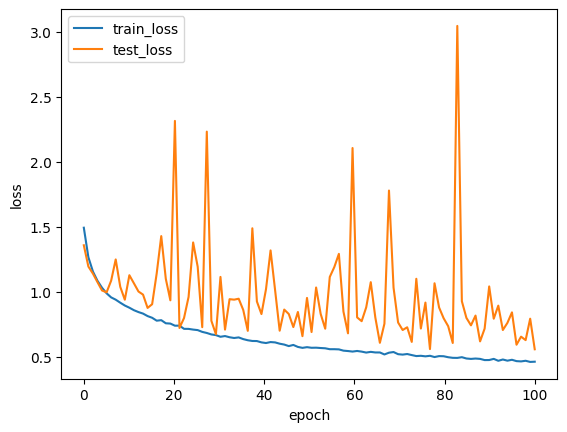

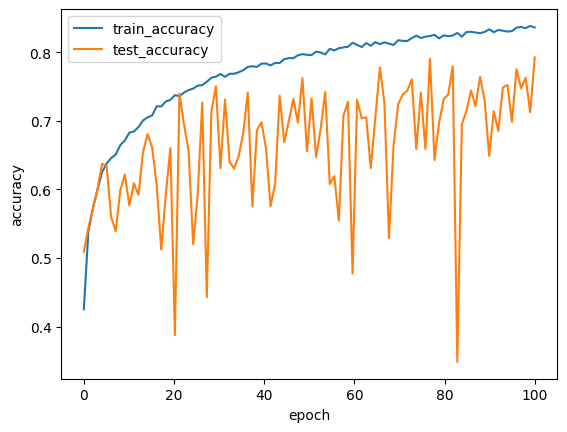

In [16]:
# 绘制loss曲线
x = np.linspace(0, len(train_loss_list), len(train_loss_list))
draw_(x, train_loss_list, test_loss_list, 'loss')
draw_(x, train_acc_list, test_acc_list, 'accuracy')

In [21]:
# 使用torch.nn实现二维卷积
class ConvModule(torch.nn.Module):
    def __init__(self):
        super(ConvModule, self).__init__()
        # 定义一个二层卷积（卷积层越少曲线越平滑，卷积层越多acc越高）
        self.conv = torch.nn.Sequential(
            # 第一层卷积
            # stride步长,padding填充
            torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=0),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(inplace=True),
            # 第二层卷积
            torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(inplace=True),
        )
        # 输出层，将输出通道数变为分类数
        self.fc = torch.nn.Linear(64, num_classes)

    def forward(self, X):
        out = self.conv(X)  # 输出维度(batch_size, C_out, H, W)
        # 平均池化
        out = F.avg_pool2d(out, 28)  # 池化后图片大小1*1
        # 将out从batch size*128*1*1变为batch size*128
        out = out.squeeze()
        out = self.fc(out)
        return out


net = ConvModule()
net.to(device)
# 损失函数和优化器
loss = torch.nn.CrossEntropyLoss()  # 交叉熵损失函数
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

# 模型训练与测试
import os

os.environ['CUDA_LAUNCH_BLOCKING'] = '0'  # 下面老是报错 shape 不一致

train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
num_epochs = 100

for epoch in range(num_epochs):
    # 在训练集上训练
    train_loss, train_acc = train(net, data_loader=train_iter, device=device)
    # 测试集上验证
    test_loss, test_acc = test(net, data_loader=test_iter, device=device)

    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    print('epoch %d, train loss: %.4f, train acc: %.3f' % (epoch + 1, train_loss, train_acc))
    print('test loss: %.4f, test acc: %.3f' % (test_loss, test_acc))

loss: 1.8322  acc: 0.1602
loss: 1.7935  acc: 0.2500
loss: 1.7871  acc: 0.2109
loss: 1.7314  acc: 0.2422
loss: 1.7381  acc: 0.2305
loss: 1.7239  acc: 0.1953
loss: 1.7112  acc: 0.1719
loss: 1.6978  acc: 0.2227
loss: 1.7112  acc: 0.1641
loss: 1.6905  acc: 0.2734
loss: 1.6942  acc: 0.2578
loss: 1.6897  acc: 0.2578
loss: 1.6415  acc: 0.3594
loss: 1.6735  acc: 0.3125
loss: 1.6385  acc: 0.3242
loss: 1.6509  acc: 0.3086
loss: 1.6679  acc: 0.3398
loss: 1.6333  acc: 0.3359
loss: 1.6541  acc: 0.3203
loss: 1.6191  acc: 0.3945
loss: 1.5917  acc: 0.4141
loss: 1.5968  acc: 0.4336
loss: 1.5893  acc: 0.4336
loss: 1.6141  acc: 0.3789
loss: 1.5856  acc: 0.4492
loss: 1.5514  acc: 0.4609
loss: 1.6131  acc: 0.3945
loss: 1.5367  acc: 0.4688
loss: 1.6009  acc: 0.3711
loss: 1.5660  acc: 0.4258
loss: 1.5309  acc: 0.4453
loss: 1.5298  acc: 0.4688
loss: 1.5550  acc: 0.4023
loss: 1.5329  acc: 0.4531
loss: 1.5241  acc: 0.5078
loss: 1.5410  acc: 0.4375
loss: 1.5372  acc: 0.4414
loss: 1.5253  acc: 0.4844
loss: 1.4921

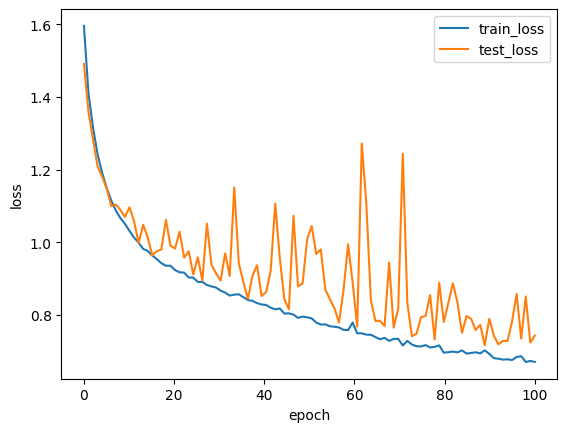

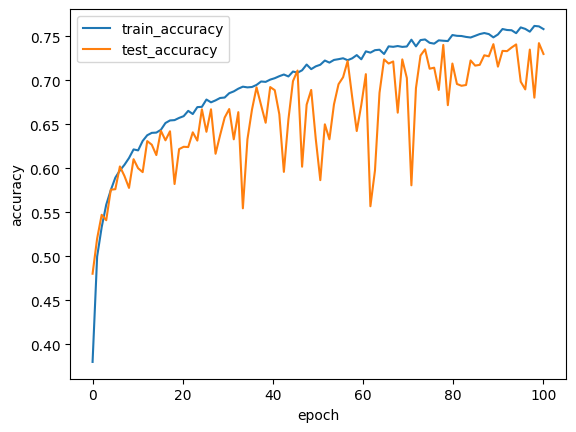

In [22]:
def draw_(x, train_Y, test_Y, ylabel):
    plt.plot(x, train_Y, label='train_' + ylabel, linewidth=1.5)
    plt.plot(x, test_Y, label='test_' + ylabel, linewidth=1.5)
    plt.xlabel('epoch')
    plt.ylabel(ylabel)
    plt.legend()  # 加上图例
    plt.show()


# 绘制loss曲线
x = np.linspace(0, len(train_loss_list), len(train_loss_list))
draw_(x, train_loss_list, test_loss_list, 'loss')
draw_(x, train_acc_list, test_acc_list, 'accuracy')